# NAME: AKSHAT GOYAL

# Data Science and Business Analytics Internship at the Sparks Foundation

# Goal - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually using Unsupervised Machine Learning (KMeans)

In [66]:
# importing nercessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [67]:
# Importing the dataset into DataFrame
A=pd.read_csv("C:/Users/Lenovo/Downloads/iris.csv")
A.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [68]:
A=A.drop(labels=["Unnamed: 0"],axis=1)
#removing the unwanted column Unnamed:0

In [69]:
A.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# Data Exploration

In [70]:
A.shape

(150, 5)

In [71]:
A.info() #Data Profiling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [72]:
A.describe() #Basic Statistics of the dataset

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Missing Value Identiification

In [73]:
A.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

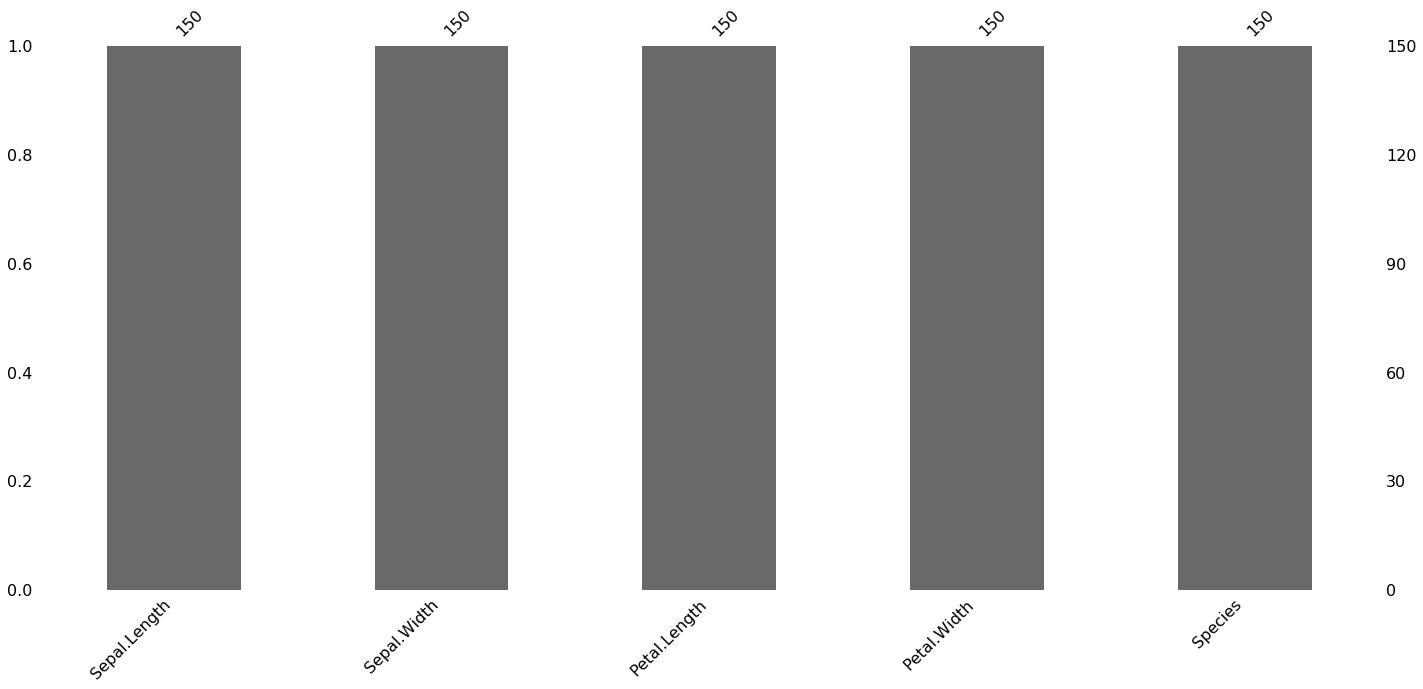

In [74]:
import missingno as mo
mo.bar(A)

# Detecting the Outliers

In [75]:
def Detecting_Outliers(Q):   # Function For Detecting Outliers
    for i in A.columns:
        if A[i].dtypes =="object":
            sb.countplot(A[i])
            plt.show()
        else:
            sb.boxplot(A[i])
            plt.show()

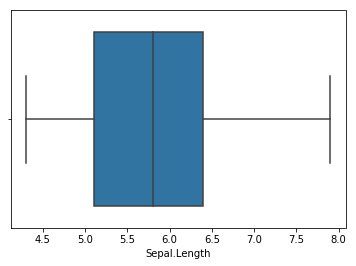

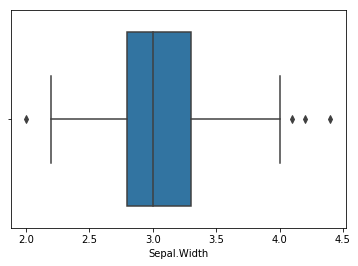

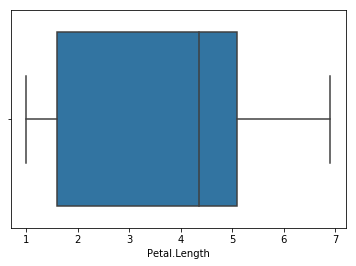

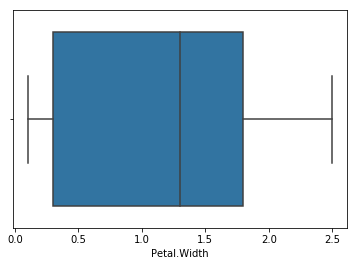

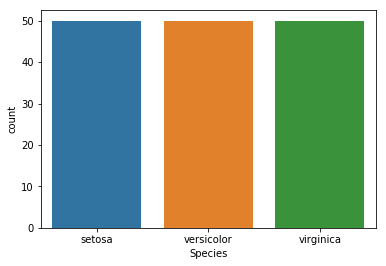

In [76]:
Detecting_Outliers(A)

# Handling The Outlier in Sepal Width Column

In [77]:
# lets remove the outlier on the basis of wall floor & wall of Dataset

In [78]:
Q1= A['Sepal.Width'].quantile(0.02) #Floor of the Data set
Q3= A["Sepal.Width"].quantile(0.98) #Wall of the Data set
B= A[(A['Sepal.Width']>=Q1) & (A['Sepal.Width']<=Q3)]
B.shape

(146, 5)

In [79]:
A.shape

(150, 5)

In [80]:
B.head() # wer have sucessfilly removed the outliers from Sepal.Width Column

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Exploratery Data Analysis

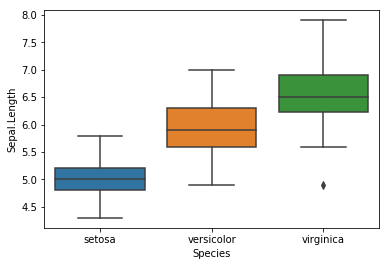

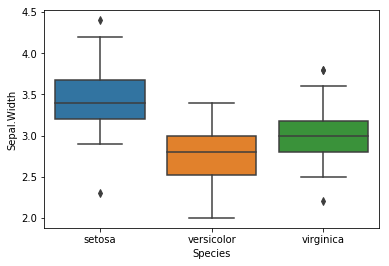

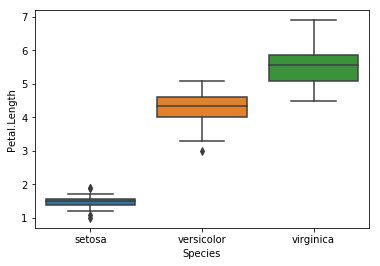

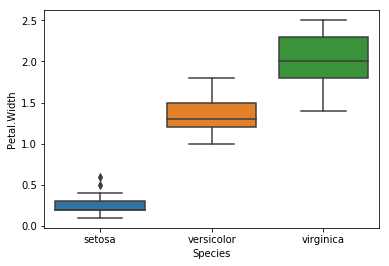

In [81]:
# Eploratery Data Analysis with respect to column 
for i in B.columns:
    if B[i].dtypes !="object":
        sb.boxplot(A["Species"],A[i])
        plt.show()
    else:
        pass

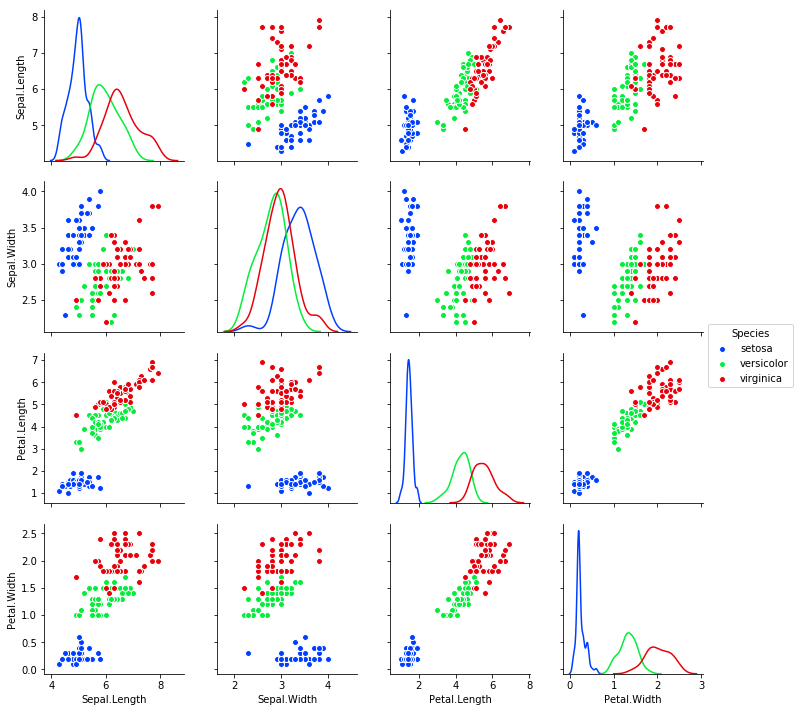

In [82]:
sb.pairplot(B,hue="Species",palette='bright',diag_kind='kde')
plt.show()

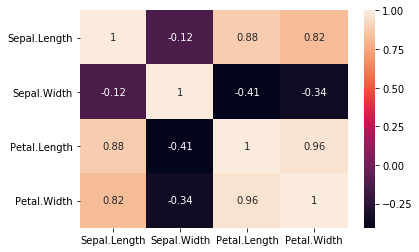

In [83]:
# Feature Correlation
sb.heatmap(B.corr(),annot=True)
plt.show()

In [84]:
B.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


# Now let's check best value of K for making clusters using WCSS(Within Clusters Sumof Squares)

In [85]:
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]    # range of values to decide which value of k is the best
WCSS = []     
features = B.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
for i in k:
   km = KMeans(n_clusters=i,init = 'k-means++',random_state = 30)
   model = km.fit(features)
   WCSS.append(model.inertia_)         #the value of within cluster sum of squares from inertia

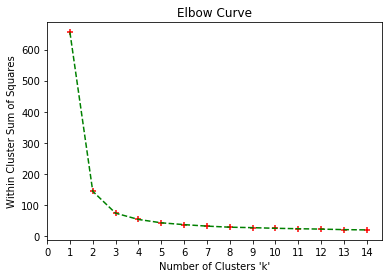

In [86]:
#Plotting Of Elbow curve
plt.scatter(k,WCSS,marker='+',c="red")
plt.plot(k,WCSS,c="green",linestyle='dashed')
plt.xlabel("Number of Clusters 'k'") # the best value of k is determined by the sudden steep / Decrease in the value of WCSS 
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(range(0,15,1)) # for the value of k in betweeen 0 & 15
plt.title("Elbow Curve")
plt.show()

# Model building

In [87]:
km = KMeans(n_clusters=3,random_state=30)
model= km.fit_predict(features)

In [88]:
B.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

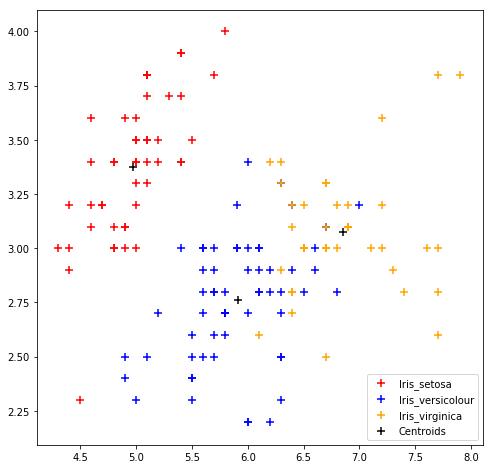

In [89]:
plt.figure(figsize=(8,8))
plt.scatter(features[model == 0, 0], features[model == 0, 1], s=50,c = 'red', label = 'Iris_setosa',marker="+")
plt.scatter(features[model == 1, 0], features[model == 1, 1], s=50,c = 'blue', label = 'Iris_versicolour',marker="+")
plt.scatter(features[model == 2, 0], features[model == 2, 1], s=50, c = 'orange', label = 'Iris_virginica',marker="+")

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],s=50, c = 'black', label = 'Centroids',marker="+")
plt.legend()
plt.show()